In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop

import os
import time

In [2]:
start = time.time()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [4]:
folder_dir = os.getcwd()
original_dataset_dir = folder_dir + '/datasets/cats_and_dogs/train'

base_dir = folder_dir + '/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print(f"data batch shape  : {data_batch.shape}")
    print(f"labels batch shape: {labels_batch.shape}")
    break

data batch shape  : (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)
        
model.save('./models/cats_and_dogs_small_1.h5')

c:\Users\Ares\anaconda3\envs\tf26\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 13s 82ms/step - loss: 0.6920 - acc: 0.5235 - val_loss: 0.6787 - val_acc: 0.6020
Epoch 2/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6654 - acc: 0.6055 - val_loss: 0.6442 - val_acc: 0.6470
Epoch 3/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6171 - acc: 0.6675 - val_loss: 0.6487 - val_acc: 0.6010
Epoch 4/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5752 - acc: 0.7030 - val_loss: 0.6630 - val_acc: 0.5950
Epoch 5/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5415 - acc: 0.7250 - val_loss: 0.6065 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5103 - acc: 0.7395 - val_loss: 0.5613 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 5s 48ms/step - loss: 0.4794 - acc: 0.7755 - val_loss: 0.5681 - val_acc: 0.7060
Epoch 8/30
100/100 [==============================] - 5s 48ms/step -

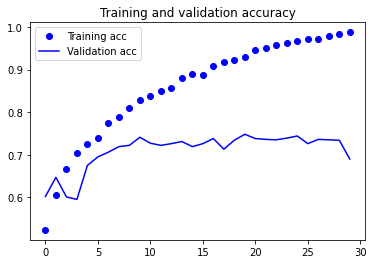

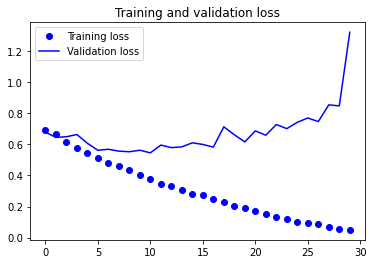

elapsed time: 159.09519839286804


In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

print(f"elapsed time: {time.time() - start}")